In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [4]:
# Simulate 60 days
days = 60
machines = 5
daily_capacity_per_machine = 350  # jobs/day

np.random.seed(42)  # for reproducibility

In [5]:
# Random demand between 800 and 2000 per day
daily_demand = np.random.randint(800, 2001, size=days)

df = pd.DataFrame({
    'Day': range(1, days + 1),
    'Job_Demand': daily_demand
})

In [6]:
machine_capacity = machines * daily_capacity_per_machine

In [7]:
# Start with empty backlogs
df['Jobs_Processed'] = 0
df['Backlog'] = 0
df['Lead_Time'] = 0.0

backlog = 0
lead_time_total = 0

for i in range(days):
    day = i
    demand = df.loc[day, 'Job_Demand'] + backlog

    if demand <= machine_capacity:
        processed = demand
        backlog = 0
    else:
        processed = machine_capacity
        backlog = demand - machine_capacity

    df.loc[day, 'Jobs_Processed'] = processed
    df.loc[day, 'Backlog'] = backlog

    # Approximate lead time (in days)
    df.loc[day, 'Lead_Time'] = backlog / machine_capacity if machine_capacity else 0

df['Utilization'] = df['Jobs_Processed'] / machine_capacity

In [8]:
# Example: Each completed job brings $200 in revenue
df['Daily_Revenue'] = df['Jobs_Processed'] * 200
df['Cumulative_Revenue'] = df['Daily_Revenue'].cumsum()

print(f"Final Revenue: ${df['Cumulative_Revenue'].iloc[-1]:,.2f}")

Final Revenue: $17,218,000.00


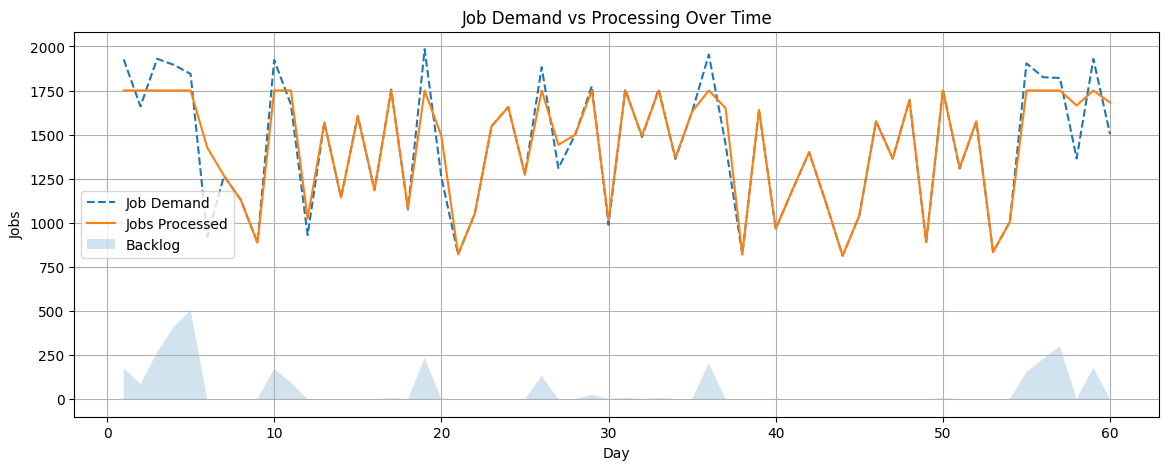

In [9]:
plt.figure(figsize=(14,5))
plt.plot(df['Day'], df['Job_Demand'], label='Job Demand', linestyle='--')
plt.plot(df['Day'], df['Jobs_Processed'], label='Jobs Processed')
plt.fill_between(df['Day'], df['Backlog'], alpha=0.2, label='Backlog')
plt.title("Job Demand vs Processing Over Time")
plt.xlabel("Day")
plt.ylabel("Jobs")
plt.legend()
plt.grid(True)
plt.show()